In [1]:
# ===============================================================
# 📊 BK_DEP – Otimização de Conversão em Campanha Bancária
# Etapa 01 – Diagnóstico Inicial e Limpeza de Dados
# Autor: Bruno Aguiar
# ===============================================================

In [2]:
# Montar Drive e importar libs
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [3]:
# Caminhos
path_banco = '/content/drive/MyDrive/DataProjects/BKDEP/dados_banco_clean.csv'
path_roi = '/content/drive/MyDrive/DataProjects/BKDEP/tabela_roi_final_otimizada.csv'

# Carregar bases
df = pd.read_csv(path_banco)
df_roi = pd.read_csv(path_roi)

print(f"Base clientes: {df.shape}")
print(f"Base ROI: {df_roi.shape}")
df.head(3)


Base clientes: (38044, 18)
Base ROI: (96, 10)


,18,student,single,nao_informado,no,438,no.1,no.2,cellular,1,sep,425,1.1,-1,0,unknown,no.3,positivo
0,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no,positivo
1,18,student,single,nao_informado,no,348,no,no,cellular,5,may,443,4,-1,0,nao_informado,yes,positivo
2,18,student,single,nao_informado,no,108,no,no,cellular,8,sep,169,1,-1,0,nao_informado,yes,positivo


In [7]:
%cd /content/drive/MyDrive/DataProjects/BKDEP
!git init
!git remote add origin https://github.com/btaguiar/BKDEP-Otimizacao-de-Conversao.git



/content/drive/MyDrive/DataProjects/BKDEP
Reinitialized existing Git repository in /content/drive/MyDrive/DataProjects/BKDEP/.git/


In [8]:
!git remote -v

origin	https://github.com/btaguiar/BKDEP-Otimizacao-de-Conversao.git (fetch)
origin	https://github.com/btaguiar/BKDEP-Otimizacao-de-Conversao.git (push)


In [9]:
!git config --global user.name "btaguiar"
!git config --global user.email "seu_email@exemplo.com"

In [4]:
# Tipos de variáveis
df.info()

# Estatísticas básicas
display(df.describe().T)

# Distribuição de variáveis categóricas
for col in ['profissao', 'estado_civil', 'educacao']:
    print(f"\n{col.upper()}:\n", df[col].value_counts(normalize=True).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38044 entries, 0 to 38043
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   18             38044 non-null  int64 
 1   student        38044 non-null  object
 2   single         38044 non-null  object
 3   nao_informado  38044 non-null  object
 4   no             38044 non-null  object
 5   438            38044 non-null  int64 
 6   no.1           38044 non-null  object
 7   no.2           38044 non-null  object
 8   cellular       38044 non-null  object
 9   1              38044 non-null  int64 
 10  sep            38044 non-null  object
 11  425            38044 non-null  int64 
 12  1.1            38044 non-null  int64 
 13  -1             38044 non-null  int64 
 14  0              38044 non-null  int64 
 15  unknown        38044 non-null  object
 16  no.3           38044 non-null  object
 17  positivo       38044 non-null  object
dtypes: int64(7), object(11)
me

,count,mean,std,min,25%,50%,75%,max
18,38044.0,41.397435,10.880567,18.0,33.0,40.0,49.00,95.0
438,38044.0,1357.365025,3067.974174,-8019.0,70.0,443.0,1416.25,102127.0
1,38044.0,15.914730,8.431511,1.0,8.0,16.0,22.00,31.0
425,38044.0,256.870834,259.228206,0.0,102.0,178.0,317.00,4918.0
1.1,38044.0,2.963017,3.304850,1.0,1.0,2.0,3.00,63.0
-1,38044.0,38.351829,97.699524,-1.0,-1.0,-1.0,-1.00,871.0
0,38044.0,0.577621,2.368946,0.0,0.0,0.0,0.00,275.0


KeyError: 'profissao'

In [ ]:
# Taxa geral
taxa_geral = df['deposito'].mean() * 100
print(f"Taxa de conversão geral: {taxa_geral:.2f}%")

# Por categoria
for col in ['profissao', 'educacao', 'estado_civil']:
    taxa = df.groupby(col)['deposito'].mean().sort_values(ascending=False) * 100
    print(f"\nTaxa média de conversão por {col}:\n", taxa.head(10))


Taxa de conversão geral: 12.37%

Taxa média de conversão por profissao:
 profissao
student          28.883774
retired          23.807229
unemployed       15.755627
management       14.451463
admin.           12.541182
self-employed    12.018592
nao_informado    11.805556
technician       11.473110
services          9.003304
housemaid         8.991597
Name: deposito, dtype: float64

Taxa média de conversão por educacao:
 educacao
tertiary         15.583496
nao_informado    14.863184
secondary        11.170240
primary           9.357143
Name: deposito, dtype: float64

Taxa média de conversão por estado_civil:
 estado_civil
single      15.511521
divorced    12.099214
married     10.896744
Name: deposito, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


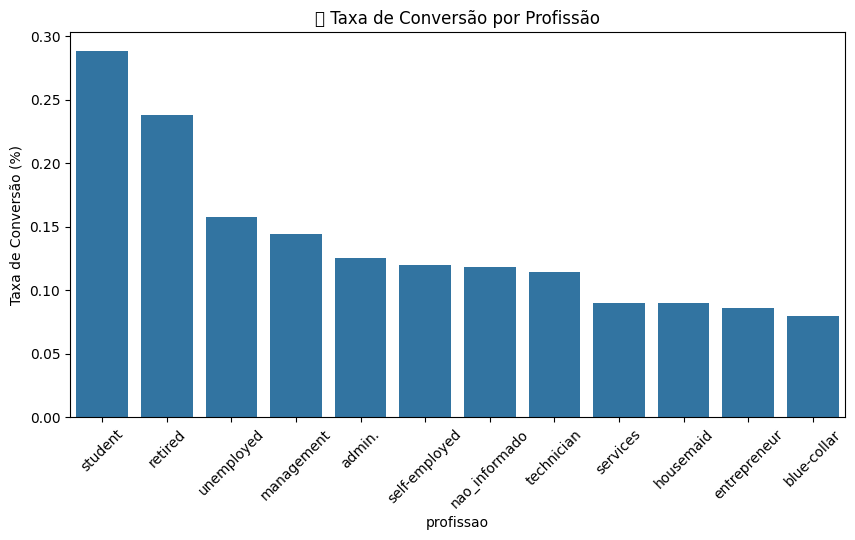

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('profissao')['deposito'].mean().sort_values(ascending=False).index,
            y=df.groupby('profissao')['deposito'].mean().sort_values(ascending=False).values)
plt.xticks(rotation=45)
plt.title(' Taxa de Conversão por Profissão')
plt.ylabel('Taxa de Conversão (%)')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


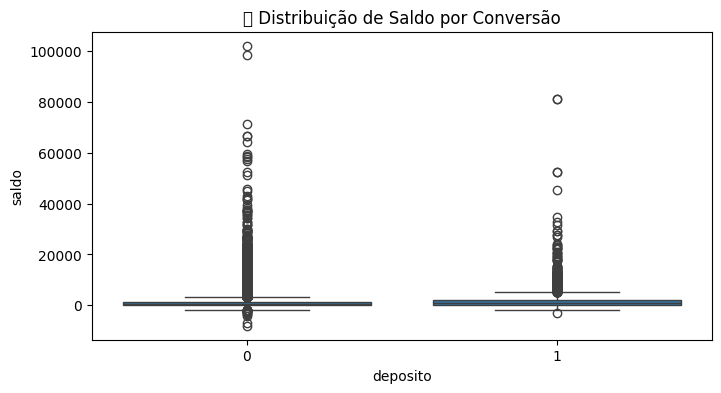

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='deposito', y='saldo', data=df)
plt.title('💰 Distribuição de Saldo por Conversão')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


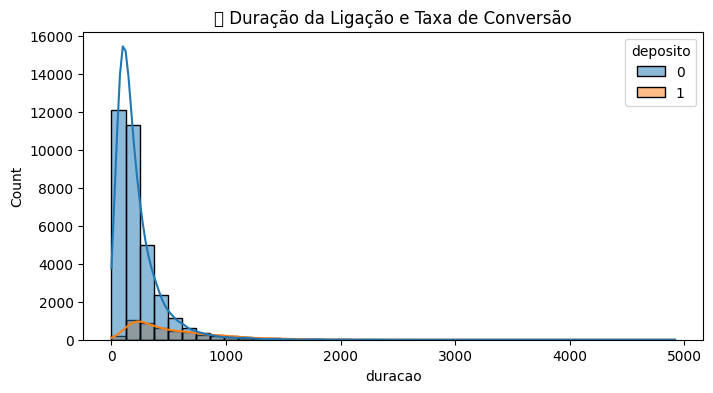

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='duracao', hue='deposito', kde=True, bins=40)
plt.title('⏱️ Duração da Ligação e Taxa de Conversão')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


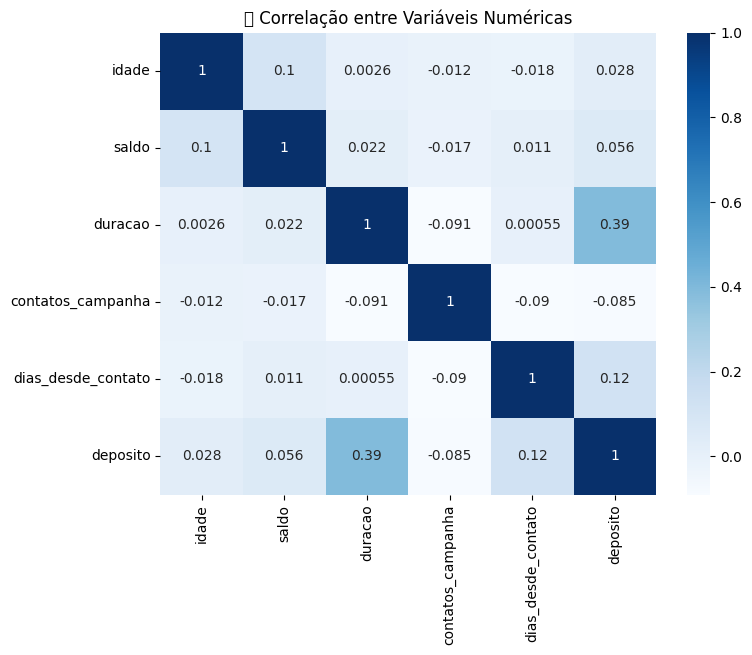

In [ ]:
corr = df[['idade','saldo','duracao','contatos_campanha','dias_desde_contato','deposito']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('🔗 Correlação entre Variáveis Numéricas')
plt.show()


/tmp/ipython-input-1699059367.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='profissao', y='ROI', data=df_merge, ci=None, estimator=np.mean)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


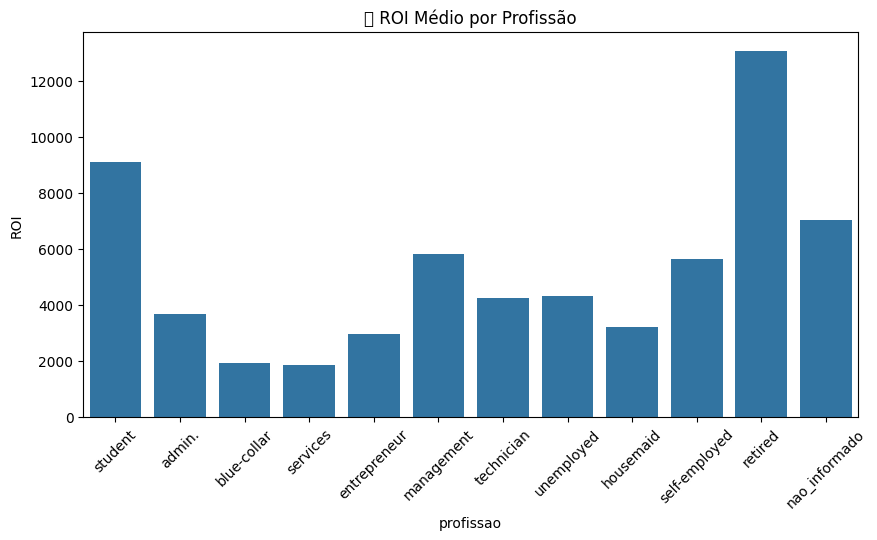

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


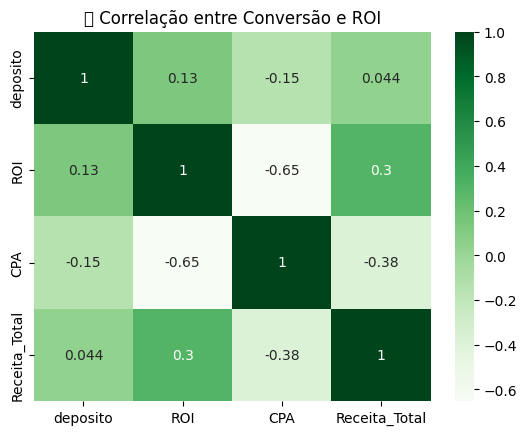

In [ ]:
# Merge com base ROI
df_merge = df.merge(df_roi, how='left', on=['profissao', 'estado_civil', 'educacao'])

# Análise: ROI médio por profissão
plt.figure(figsize=(10,5))
sns.barplot(x='profissao', y='ROI', data=df_merge, ci=None, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('📊 ROI Médio por Profissão')
plt.show()

# Correlação entre taxa de conversão e ROI
corr_roi = df_merge[['deposito','ROI','CPA','Receita_Total']].corr()
sns.heatmap(corr_roi, annot=True, cmap='Greens')
plt.title('🔗 Correlação entre Conversão e ROI')
plt.show()


In [ ]:
# Listar colunas de comparação
chaves = ['profissao', 'estado_civil', 'educacao']

# Verificar se há categorias em df_roi que não existem em df
for col in chaves:
    diff_roi = set(df_roi[col].unique()) - set(df[col].unique())
    diff_banco = set(df[col].unique()) - set(df_roi[col].unique())
    print(f"\n🔍 {col.upper()}")
    print(f"No ROI e não no Banco: {diff_roi}")
    print(f"No Banco e não no ROI: {diff_banco}")



🔍 PROFISSAO
No ROI e não no Banco: set()
No Banco e não no ROI: set()

🔍 ESTADO_CIVIL
No ROI e não no Banco: set()
No Banco e não no ROI: set()

🔍 EDUCACAO
No ROI e não no Banco: set()
No Banco e não no ROI: set()


In [ ]:
print("\nSegmentos únicos em cada base:")
print("df_banco:", df[chaves].drop_duplicates().shape[0])
print("df_roi:", df_roi[chaves].drop_duplicates().shape[0])



Segmentos únicos em cada base:
df_banco: 144
df_roi: 96


In [ ]:
# Merge (left: banco, right: ROI)
df_merge = df.merge(df_roi, how='left', on=chaves)

# Verificar se todos os registros do banco encontraram correspondência de ROI
percent_match = df_merge['ROI'].notnull().mean() * 100
print(f"\n🔗 Correspondência de segmentos com ROI encontrada em {percent_match:.2f}% dos registros.")

# Exibir preview
df_merge.head(5)



🔗 Correspondência de segmentos com ROI encontrada em 98.36% dos registros.


,idade,profissao,estado_civil,educacao,credito_em_atraso,saldo,emprestimo_habitacional,emprestimo_pessoal,tipo_contato,dia,...,mes_num,recontato,tempo_recente,Total_Contactados,Total_Convertidos,Receita_Media,Custo_Total,Receita_Total,CPA,ROI
0,18,student,single,nao_informado,0,438,0,0,cellular,1,...,9,0,0,140.0,39.0,1291.41,700.0,50365.0,17.95,7095.00
1,18,student,single,secondary,0,156,0,0,cellular,4,...,11,1,82,449.0,136.0,1387.55,2245.0,188707.0,16.51,8305.66
2,18,student,single,nao_informado,0,348,0,0,cellular,5,...,5,0,0,140.0,39.0,1291.41,700.0,50365.0,17.95,7095.00
3,18,student,single,nao_informado,0,108,0,0,cellular,8,...,9,0,0,140.0,39.0,1291.41,700.0,50365.0,17.95,7095.00
4,18,student,single,nao_informado,0,108,0,0,cellular,9,...,2,1,183,140.0,39.0,1291.41,700.0,50365.0,17.95,7095.00


In [ ]:
sem_roi = df_merge[df_merge['ROI'].isnull()]
print(f"\nRegistros sem ROI associado: {len(sem_roi)}")
if len(sem_roi) > 0:
    display(sem_roi[chaves].drop_duplicates())



Registros sem ROI associado: 624


,profissao,estado_civil,educacao
54,student,married,nao_informado
350,entrepreneur,single,primary
396,student,married,tertiary
597,self-employed,single,nao_informado
722,technician,single,primary
966,nao_informado,single,secondary
967,nao_informado,single,nao_informado
1057,student,married,secondary
1256,admin.,single,primary
1527,management,single,primary


In [ ]:
comparativo = (
    df_merge.groupby(chaves)
    .agg(
        taxa_conversao=('deposito', 'mean'),
        ROI=('ROI', 'mean'),
        CPA=('CPA', 'mean')
    )
    .reset_index()
)

comparativo['taxa_conversao'] = comparativo['taxa_conversao'] * 100
comparativo.sort_values(by='ROI', ascending=False).head(10)


,profissao,estado_civil,educacao,taxa_conversao,ROI,CPA
87,self-employed,divorced,tertiary,22.666667,32800.27,22.06
128,technician,single,nao_informado,17.741935,32181.94,28.18
79,retired,married,tertiary,28.947368,15933.68,17.27
45,housemaid,single,primary,19.512195,15824.39,25.63
48,management,divorced,nao_informado,23.333333,15599.33,21.43
78,retired,married,secondary,21.397380,15329.37,23.37
117,student,single,primary,37.500000,13712.50,13.33
77,retired,married,primary,22.262774,12599.23,22.46
73,retired,divorced,primary,30.379747,11806.20,16.46
119,student,single,tertiary,27.472527,11714.07,18.20


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


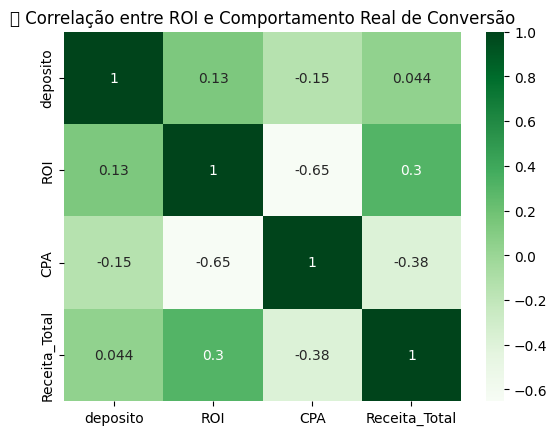

In [ ]:
corr_merge = df_merge[['deposito', 'ROI', 'CPA', 'Receita_Total']].corr()
sns.heatmap(corr_merge, annot=True, cmap='Greens')
plt.title("📊 Correlação entre ROI e Comportamento Real de Conversão")
plt.show()


In [ ]:
# Filtrar registros sem ROI
sem_roi = df_merge[df_merge['ROI'].isnull()]

# Contar combinações únicas
faltantes = sem_roi.groupby(['profissao','estado_civil','educacao']).size().reset_index(name='qtd')
faltantes.sort_values(by='qtd', ascending=False)


,profissao,estado_civil,educacao,qtd
1,admin.,divorced,primary,29
24,retired,single,tertiary,27
44,unemployed,divorced,primary,26
2,admin.,single,primary,25
17,nao_informado,married,tertiary,25
18,nao_informado,single,nao_informado,25
11,management,divorced,primary,24
45,unemployed,divorced,tertiary,24
20,nao_informado,single,secondary,24
27,self-employed,married,nao_informado,23


In [ ]:
roi_extra = (
    df.groupby(['profissao','estado_civil','educacao'])
      .agg(taxa_conversao=('deposito','mean'))
      .reset_index()
)

# Merge com os faltantes
faltantes_roi = faltantes.merge(roi_extra, on=['profissao','estado_civil','educacao'], how='left')

display(faltantes_roi)


,profissao,estado_civil,educacao,qtd,taxa_conversao
0,admin.,divorced,nao_informado,16,0.062500
1,admin.,divorced,primary,29,0.103448
2,admin.,single,primary,25,0.080000
3,blue-collar,divorced,tertiary,4,0.000000
4,entrepreneur,divorced,nao_informado,6,0.333333
5,entrepreneur,divorced,primary,9,0.000000
6,entrepreneur,single,nao_informado,12,0.166667
7,entrepreneur,single,primary,18,0.111111
8,housemaid,divorced,nao_informado,5,0.000000
9,housemaid,divorced,tertiary,18,0.055556


In [ ]:
for idx, row in faltantes_roi.iterrows():
    df_merge.loc[
        (df_merge['profissao']==row['profissao']) &
        (df_merge['estado_civil']==row['estado_civil']) &
        (df_merge['educacao']==row['educacao']),
        'ROI'
    ] = row['taxa_conversao'] * 10000  # exemplo de proxy


In [ ]:
print(f"Registros com ROI nulo após tratamento: {df_merge['ROI'].isnull().sum()}")


Registros com ROI nulo após tratamento: 0


In [ ]:
path_merge = '/content/drive/MyDrive/DataProjects/BKDEP/dados_banco_merged.csv'
df_merge.to_csv(path_merge, index=False)
print(f"✅ Base integrada e validada exportada para: {path_merge}")


✅ Base integrada e validada exportada para: /content/drive/MyDrive/DataProjects/BKDEP/dados_banco_merged.csv
